In [20]:
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

In [2]:
AMZN= pd.read_csv('AMZN.csv',index_col='Date', parse_dates=True)
AMZN.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-04-21,106.099998,108.150002,105.080002,106.959999,106.959999,86774200
2023-04-24,107.660004,109.230003,105.070000,106.209999,106.209999,69575600
2023-04-25,104.910004,105.449997,102.449997,102.570000,102.570000,65026800
2023-04-26,105.040001,106.620003,104.099998,104.980003,104.980003,73803800
2023-04-27,108.160004,110.860001,106.800003,109.820000,109.820000,149961200


In [36]:
AMZN.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2023-04-21 to 2024-04-19
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       251 non-null    float64
 1   High       251 non-null    float64
 2   Low        251 non-null    float64
 3   Close      251 non-null    float64
 4   Adj Close  251 non-null    float64
 5   Volume     251 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.7 KB


*Yes, the DataFrame appears to be indexed by time values. I can tell this because the "Date" column is set as the index of the DataFrame, as indicated by the argument index_col='Date' when reading the CSV file. Additionally, the parse_dates=True argument is used, which instructs pandas to parse the "Date" column as datetime objects.*

*So, by setting the "Date" column as the index and parsing it as datetime objects, the DataFrame is indeed indexed by time values. This allows for easier time-based operations and analysis on the data.*

In [40]:
# View the index attribute of the time series
AMZN.index

# View the max and min values of the index attribute
max_index = AMZN.index.max()
min_index = AMZN.index.min()
max_index, min_index


(Timestamp('2024-04-19 00:00:00'), Timestamp('2023-04-21 00:00:00'))

In [41]:

argmax_index = AMZN.index.argmax()
argmin_index = AMZN.index.argmin()
argmax_index, argmin_index

(250, 0)

*The results of max and min functions applied to a DataFrame indexed by time values represent the maximum and minimum values of the DataFrame's index, respectively. In this case*:


*   *Max: (Timestamp('2024-04-19 00:00:00')): Indicates that the maximum value in the index (i.e., the latest date) is April 19, 2024.*


*   *Min: (Timestamp('2023-04-21 00:00:00')): Indicates that the minimum value in the index (i.e., the earliest date) is April 21, 2023.*


*On the other hand, argmax and argmin functions return the indices (positions) of the maximum and minimum values, respectively, in the DataFrame's index. In this case*:



*   *argmax: 250: Indicates that the maximum value occurs at index position 250.*
*   *argmin: 0: Indicates that the minimum value occurs at index position 0.*


*These results can be useful for locating specific dates or performing operations based on the position of dates within the DataFrame's index.*

<Axes: xlabel='Date'>

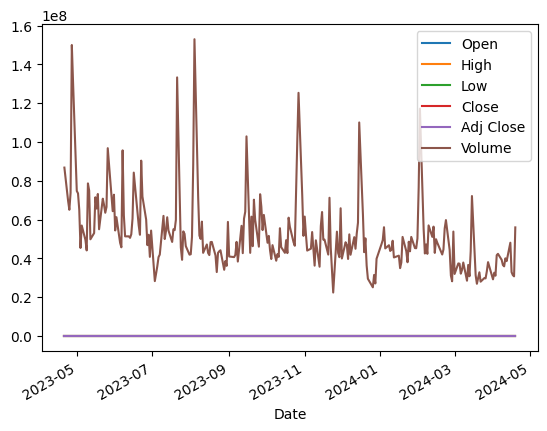

In [42]:
AMZN.plot()

*The graph appears to be a time series plot showing the trends of Amazon stock market indicators (Open, High, Low, Close, Adjusted Close, Volume) over time.*

*Challenges in interpreting this graph*:



*   *Overlapping lines: The lines representing different indicators overlap each other, making it difficult to distinguish between them.*
*   *Lack of clarity: The lines are closely packed together, resulting in a cluttered appearance and making it challenging to discern individual trends*.
*   Scaling: *The y-axis scale is not clearly labeled, making it unclear what the values represent.*
*  Absence of context: *There is no title or description provided, leaving viewers unaware of the specific stock or time period being analyzed.*

*To make the graph easier to understand*:

*  *Differentiate lines: Using distinct colors or line styles for each indicator would help differentiate them.*
*  *Increase spacing: Adjusting the spacing between the lines or using multiple graphs with fewer indicators per graph can prevent overcrowding.*
*  *Differentiate lines: Using distinct colors or line styles for each indicator would help differentiate them.*


<Axes: xlabel='Date'>

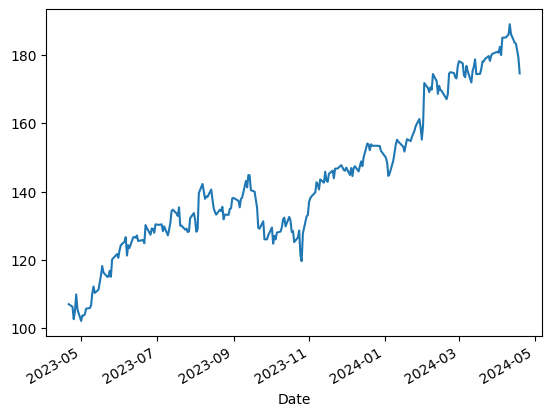

In [43]:
AMZN['Close'].plot()

*The graph displays the trend of the 'Close' variable over time. It shows an overall increasing trend with fluctuations in between. This graph is more easily interpretable than the previous one because it focuses on a single variable ('Close'), eliminating the clutter caused by multiple lines. Additionally, the absence of overlapping lines and clearer spacing between data points make it easier to discern the trend and fluctuations in the variable.*

<Axes: xlabel='Date'>

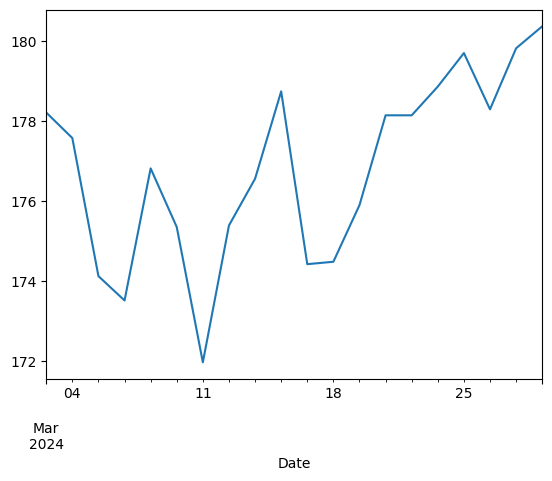

In [44]:
# Plot the daily 'Close' variable for a one-month period
AMZN['Close']['2024-03-01':'2024-03-31'].plot()


<Axes: xlabel='Date'>

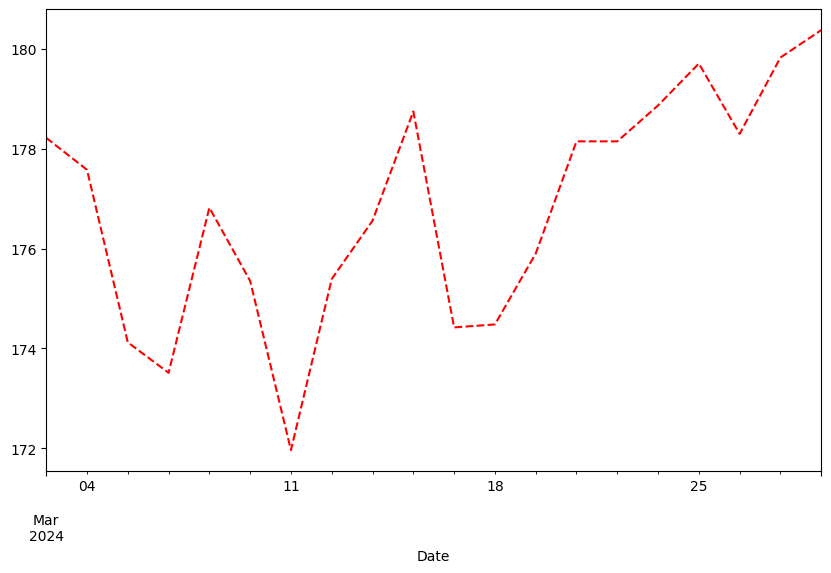

In [45]:

AMZN['Close']['2024-03-01':'2024-03-31'].plot(figsize=(10, 6), color='red', linestyle='--')


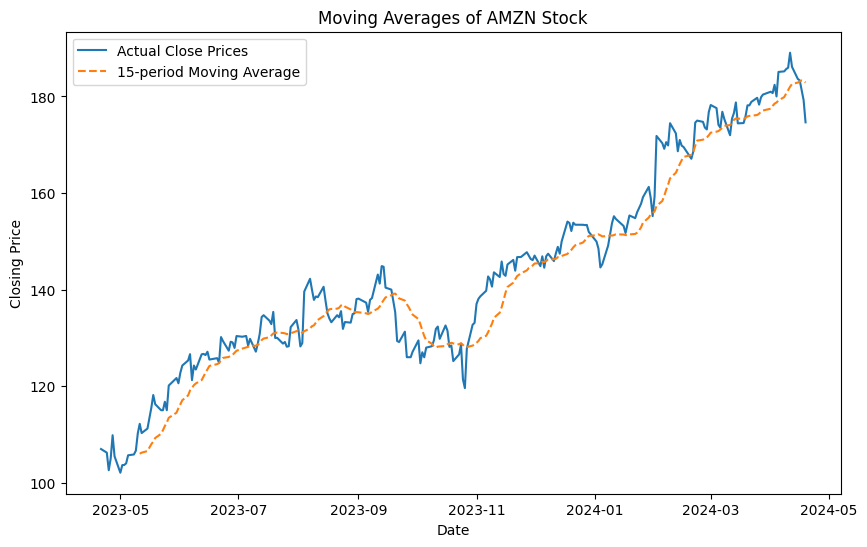

In [48]:
ma_15 = AMZN['Close'].rolling(window=15).mean()

plt.figure(figsize=(10, 6))
plt.plot(AMZN['Close'], label='Actual Close Prices')
plt.plot(ma_15, label='15-period Moving Average', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Moving Averages of AMZN Stock')
plt.legend()

# Show plot
plt.show()

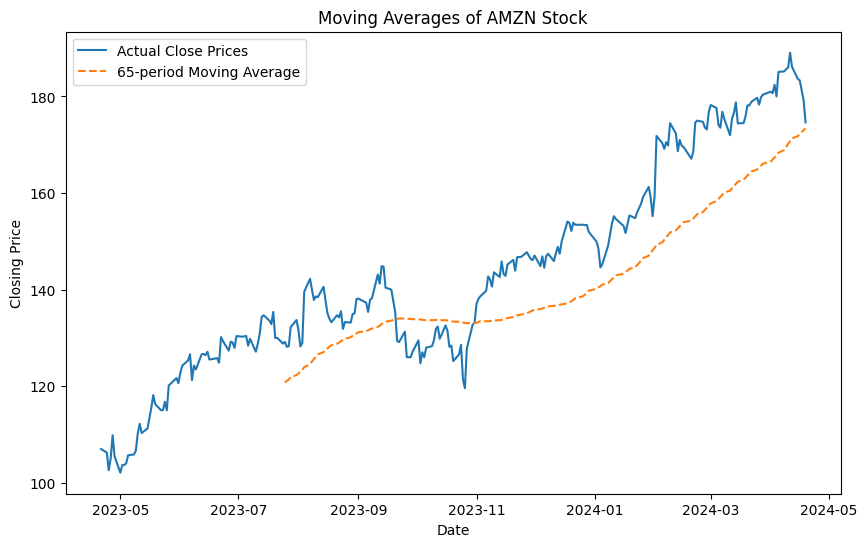

In [49]:

ma_65 = AMZN['Close'].rolling(window=65).mean()
plt.figure(figsize=(10, 6))
plt.plot(AMZN['Close'], label='Actual Close Prices')
plt.plot(ma_65, label='65-period Moving Average', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Moving Averages of AMZN Stock')
plt.legend()

# Show plot
plt.show()

*The two moving average plots display the actual close prices of the AMZN stock along with two different moving averages: a 15-period moving average in the first plot and a 65-period moving average in the second plot.*

*Differences between the two moving average plots:*


*  *Smoothness of the curve: The shorter moving average (15-period) reacts more quickly to price changes, resulting in a curve that closely follows the fluctuations in the actual close prices. In contrast, the longer moving average (65-period) reacts more slowly to price changes, resulting in a smoother curve with less volatility.*


*Pros and cons of shorter and longer moving average windows:*

***Shorter moving average window:***

*Pros:*
*   *More responsive to recent price changes, providing timely signals for buying or selling opportunities.*
*  *Better suited for short-term trading strategies and capturing short-term trends.*

*Cons:*
*  *More susceptible to noise and false signals due to higher volatility.*
*   *May result in frequent whipsaws (buy and sell signals) in choppy or sideways markets.*

***Longer moving average window:***

*Pros:*
*   *Smoother curve that filters out noise and provides a clearer trend direction.*
*  *Less susceptible to false signals and whipsaws, making it more suitable for long-term investment strategies.*

*Cons:*

*   *Slower to react to price changes, potentially missing out on early entry or exit signals.*
*  *Less responsive to short-term trends, which may result in delayed trading decisions.*



*In summary, the choice between shorter and longer moving average windows depends on the trader's investment horizon, risk tolerance, and trading strategy. Shorter moving averages are preferred for short-term trading, while longer moving averages are better suited for long-term investing.*

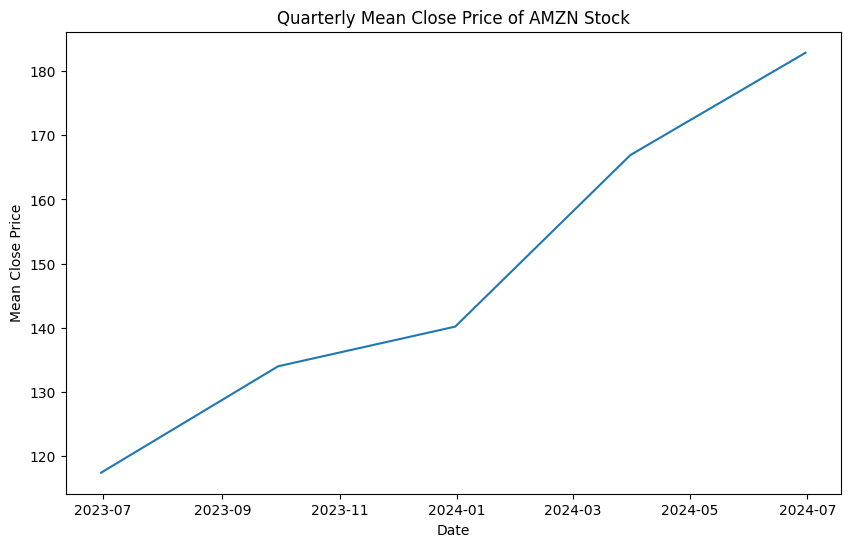

In [50]:
# Resample the time series to quarterly periods and calculate the mean
quarterly_close_mean = AMZN['Close'].resample('Q').mean()

# Plot the newly-resampled time series
plt.figure(figsize=(10, 6))
plt.plot(quarterly_close_mean)
plt.xlabel('Date')
plt.ylabel('Mean Close Price')
plt.title('Quarterly Mean Close Price of AMZN Stock')
plt.show()


*Consider a scenario where a meteorologist wants to analyze temperature data collected every hour to identify daily temperature patterns. However, hourly data might be too granular for their analysis, leading to excessive noise and difficulty in detecting trends. By resampling the time series data to daily intervals, the meteorologist can smooth out the fluctuations and focus on larger-scale patterns, such as daily temperature highs and lows. This allows for easier interpretation of the data and more accurate identification of long-term weather patterns, aiding in forecasting and climate analysis.*

In [4]:
schwab_ads= pd.read_csv ('schwab_ads.csv')

In [5]:
schwab_ads.head()

,Web,Bus_Stop,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [6]:
schwab_ads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Web        200 non-null    float64
 1   Bus_Stop   200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [7]:
schwab_ads['total_spending'] = schwab_ads['Web'] +schwab_ads['Bus_Stop'] +schwab_ads['Newspaper']
schwab_ads

,Web,Bus_Stop,Newspaper,Sales,total_spending
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,12.0,132.4
3,151.5,41.3,58.5,16.5,251.3
4,180.8,10.8,58.4,17.9,250.0
...,...,...,...,...,...
195,38.2,3.7,13.8,7.6,55.7
196,94.2,4.9,8.1,14.0,107.2
197,177.0,9.3,6.4,14.8,192.7
198,283.6,42.0,66.2,25.5,391.8


In [8]:
correlation = schwab_ads['total_spending'].corr(schwab_ads['Sales'])
print("Correlation between total spending and Sales:", correlation)

Correlation between total spending and Sales: 0.924917006249931


*The correlation coefficient of 0.925 between total marketing spending and sales suggests a strong positive correlation between the two variables. However, it's important to note that correlation does not imply causation.*

*In this case, while there is a strong correlation between total marketing spending and sales, it does not necessarily mean that increasing ad spending directly leads to an increase in sales. There could be various other factors at play that contribute to the observed correlation.*

*For instance, factors such as market demand, product quality, brand reputation, competitive landscape, economic conditions, and seasonality can all influence sales performance. Additionally, the effectiveness of marketing campaigns, targeting strategies, and product positioning can also impact sales outcomes.*

*Therefore, while a high correlation suggests a relationship between total marketing spending and sales, it doesn't provide conclusive evidence that increasing ad spending will lead to a proportional increase in sales. To establish causality, further analysis such as experimentation, causal inference methods, or controlled studies may be required.*

In [9]:
correlation_matrix = schwab_ads[['Web', 'Bus_Stop', 'Newspaper']].corr()

print("Correlation matrix:")
correlation_matrix


Correlation matrix:


,Web,Bus_Stop,Newspaper
Web,1.000000,0.054809,0.056648
Bus_Stop,0.054809,1.000000,0.354104
Newspaper,0.056648,0.354104,1.000000


*keeping the threeshold 0.5, No any of this correlations is not so high that we might not be able to use them together in a linear model*

In [14]:
X = schwab_ads[['Web','Bus_Stop','Newspaper']]
y = schwab_ads['Sales']

X = sm.add_constant(X)
model1 = sm.OLS(y, X).fit()
summary = model1.summary()

print(summary)


                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     605.4
Date:                Sun, 21 Apr 2024   Prob (F-statistic):           8.13e-99
Time:                        23:04:00   Log-Likelihood:                -383.34
No. Observations:                 200   AIC:                             774.7
Df Residuals:                     196   BIC:                             787.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6251      0.308     15.041      0.0

*The p-value of the F-Statistic for this model is 8.13e-99, which is extremely close to zero. This indicates that the model's overall regression is statistically significant. In other words, there is strong evidence to suggest that at least one of the predictors in the model is significantly related to the target variable.*

*Indivdual  p-values suggest the following:*

*   *The predictors "Web" and "Bus_Stop" have p-values of 0.000, indicating that they are statistically significant predictors of the target variable*.

*   *The predictor "Newspaper" has a p-value of 0.954, which is greater than the conventional significance level of 0.05. This suggests that "Newspaper" is not a statistically significant predictor of the target variable*.

*In summary, "Web" and "Bus_Stop" are likely important predictors in the model, while "Newspaper" may not be significant and could potentially be excluded from the model without significantly affecting its predictive power.*

In [15]:
Bus_Wed_add_interaction = 'Sales ~ Web + Bus_Stop + Web:Bus_Stop'

# Fit the linear regression model
model = smf.ols(Bus_Wed_add_interaction, data=schwab_ads).fit()

# Get the summary of the model
summary = model.summary()

print(summary)

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     694.7
Date:                Sun, 21 Apr 2024   Prob (F-statistic):          3.90e-104
Time:                        23:04:02   Log-Likelihood:                -370.83
No. Observations:                 200   AIC:                             749.7
Df Residuals:                     196   BIC:                             762.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.1926      0.410     15.101   

*The p-values for each of the predictors in this model are less than 0.05, which is commonly used as the threshold for statistical significance. This suggests that all the predictors, including the interaction term "Web:Bus_Stop," are statistically significant in explaining the variation in the target variable.*



In [19]:
X = schwab_ads[['Web','Bus_Stop']]
y = schwab_ads['Sales']

X = sm.add_constant(X)
model3 = sm.OLS(y, X).fit()
summary = model3.summary()

print(summary)

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     912.7
Date:                Sun, 21 Apr 2024   Prob (F-statistic):          2.39e-100
Time:                        23:34:33   Log-Likelihood:                -383.34
No. Observations:                 200   AIC:                             772.7
Df Residuals:                     197   BIC:                             782.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6309      0.290     15.952      0.0

*The \( R^2 \) value of the model with interaction (\( R^2 = 0.914 \)) is slightly higher than the \( R^2 \) value of the model without interaction
(\( R^2 = 0.903 \)). This difference suggests that the inclusion of the interaction term improves the explanatory power of the model slightly. Including interaction terms allows the model to capture additional complexity or non-linear relationships between the predictors and the response variable, resulting in a better fit to the data and a higher \( R^2 \) value. Therefore, the presence of the interaction term enhances the model's ability to explain the variability in the dependent variable compared to the model without interaction.*

In [17]:
# Define the values for web ad spending and bus stop ad spending
Web = 150
Bus_Stop= 24

predicted_sales = model.predict({'Web': Web,
                                 'Bus_Stop': Bus_Stop,
                                 'Web:Bus_Stop': Web * Bus_Stop})

print("Predicted sales outcome:", predicted_sales)

Predicted sales outcome: 0    15.3391
dtype: float64


*Based on the regression model with the interaction term, the predicted sales outcome for a marketer using 150 units of web ad spending and 24 units of bus stop ad spending would be approximately 15.3391 units.*

*The interaction effect between bus stop and web ad spending suggests that the impact of one advertising channel on sales is influenced by the level of spending in the other channel. In simpler terms, it means that the combined effect of both bus stop and web ad spending on sales is not simply the sum of their individual effects. Instead, their joint impact on sales is greater or lesser than expected based on their individual effects alone, indicating that there's a synergistic or antagonistic relationship between these two advertising mediums. This insight is valuable for marketers as it highlights the importance of considering the combined influence of different advertising channels on overall sales performance.*

*I found an example of an interaction term in a study examining the relationship between exercise intensity and hydration status on athletic performance. In this scenario, the variables are exercise intensity (low, moderate, high) and hydration status (hydrated, dehydrated). The study revealed a significant interaction effect, indicating that the impact of exercise intensity on athletic performance depends on hydration status. Surprisingly, the interaction showed that moderate exercise intensity had a more positive effect on performance when athletes were dehydrated compared to when they were hydrated. This finding challenges conventional wisdom and underscores the complexity of physiological responses to exercise and hydration.*